# Algerian Forest Fires Dataset Project EDA Part

1. UNDERSTANDING THE GIVEN TASK

Task Given by instructor Krish Naik

    Solve in ipynb:
- Import the dataset. https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset
- Do proper EDA(analysis) of your dataset and create a report
- Then perform necessary preprocessing steps


2. DATA COLLECTION AND UNDERSTANDING

I used a dataset on Algerian Forest Fires from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset is from June 2012 to September 2012. In this project, we focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms.
As per the Task given i choose regression problem to predict fire weather index.

3. DATA EXPLORATION
In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.

    Below are tasks to be performed in EDA:

1. Importing Libraries

2. Data Cleaning for EDA Report

3. Exploratory Data Analysis (EDA) on all Features

## Additional Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

### Weather data observations 
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8

### FWI Components  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 

7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 

8. Drought Code (DC) index from the FWI system:  7 to 220.4

9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 

10. Buildup Index (BUI) index from the FWI system: 1.1 to 68

11. Fire Weather Index (FWI) Index: 0 to 31.1

12. Classes: two classes, namely   â€œFireâ€ and â€œnot Fireâ€

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header = 1)  # because we want make row 1 as col name

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


 ## Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

After that conclude about the step

In [4]:
df.shape

(246, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [7]:
# null col wise 
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [8]:
# row wise null value 
df.isnull().any(axis = 1).sum()

2

In [9]:
# value in data frames
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [10]:
df.loc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


### The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

## Add new column with region

In [11]:
df.loc[:122, "Region"] = 1
df.loc[122:, "Region"] = 2

df["Region"] = df["Region"].astype(int)

In [12]:
df.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1
31,02,07,2012,27,75,19,1.2,55.7,2.4,8.3,0.8,2.8,0.3,not fire,1
164,11,07,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,not fire,2
238,23,09,2012,35,56,14,0,89,29.4,115.6,7.5,36,15.2,fire,2
41,12,07,2012,31,75,13,0.1,75.1,7.9,27.7,1.5,9.2,0.9,not fire,1
234,19,09,2012,29,41,8,0.1,83.9,24.9,86,2.7,28.9,5.6,fire,2
141,18,06,2012,33,62,10,8.7,65.5,4.6,8.3,0.9,4.4,0.4,not fire,2
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2
37,08,07,2012,33,68,19,0,85.6,12.5,49.8,6,15.4,8,fire,1
188,04,08,2012,38,35,15,0,93.8,23,42.7,15.7,22.9,20.9,fire,2


In [13]:
df[df.isnull().any(axis=1)]  # still having na row

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,2


In [14]:
# Remove null or na values rows
              # removed row index asign to next index in the DataFrame.
df =df.dropna().reset_index(drop=True) 
df.shape

(244, 15)

In [15]:
df.loc[120:125] # null row is get removed

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,1
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2
123,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
124,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
125,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2


In [16]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [17]:
# removing the string row
df = df.drop(122).reset_index(drop = True)

In [18]:
df.shape

(243, 15)

In [19]:
# Check Duplicates

df.duplicated().sum()

0

### There is not any duplicated row inside of df

## Some column names were misspaced so we can fix it

In [20]:
# List out column names to check 
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [21]:
# fixing space in columns 
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [23]:
df.head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1


### Changing the required columns as integer data type

In [24]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

 ### Changing the other columns to Float data type


In [25]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [26]:
# Final datatypes check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


### Data Cleaning in target variable

In [27]:
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
90,30,8,2012,35,70,17,0.8,72.7,25.2,180.4,1.7,37.4,4.2,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,2
45,16,7,2012,28,76,21,0.0,72.6,7.0,25.5,0.7,8.3,0.4,not fire,1
30,1,7,2012,29,68,19,1.0,59.9,2.5,8.6,1.1,2.9,0.4,not fire,1


In [28]:
df["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [29]:
# we have addision spaces from clasess
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [30]:
## Encodng of the categories in classes 
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [31]:
df["Classes"].sample(5)

78    1
33    0
99    0
52    0
91    0
Name: Classes, dtype: int64

In [32]:
df["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [33]:
df.sample(10) # encoded the classes feature into encoded_class 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
45,16,7,2012,28,76,21,0.0,72.6,7.0,25.5,0.7,8.3,0.4,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2
205,24,8,2012,35,38,15,0.0,92.1,51.3,147.7,12.2,54.9,26.9,1,2
233,21,9,2012,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4,21.6,1,2
237,25,9,2012,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,0,2
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,1,2
128,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,1,2
39,10,7,2012,33,69,13,0.7,66.6,6.0,9.3,1.1,5.8,0.5,0,1
12,13,6,2012,27,84,21,1.2,50.0,6.7,17.0,0.5,6.7,0.2,0,1
41,12,7,2012,31,75,13,0.1,75.1,7.9,27.7,1.5,9.2,0.9,0,1


In [44]:
# saving the cleaned csv file
df.to_csv("Forest_clean_ds.csv", index = False)

## Performing EDA

In [45]:
df1 = pd.read_csv("Forest_clean_ds.csv")

In [46]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [47]:
# droping the features and creating new dataset

df1 = df1.drop(["day","month","year"], axis = 1)

In [48]:
df1.sample(6)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
203,37,53,14,0.0,89.5,41.1,127.5,8.0,45.5,18.1,1,2
46,29,70,14,0.0,82.8,9.4,34.1,3.2,11.1,3.6,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
49,33,65,15,0.1,81.4,12.3,62.1,2.8,16.5,4.0,1,1
171,36,29,18,0.0,93.9,39.6,80.6,18.5,39.5,30.0,1,2
137,29,87,15,0.4,47.4,4.2,8.0,0.2,4.1,0.1,0,2


In [49]:
df["month"].value_counts()

8    62
7    61
6    60
9    60
Name: month, dtype: int64

In [50]:
df["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

/tmp/ipykernel_267/684247386.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


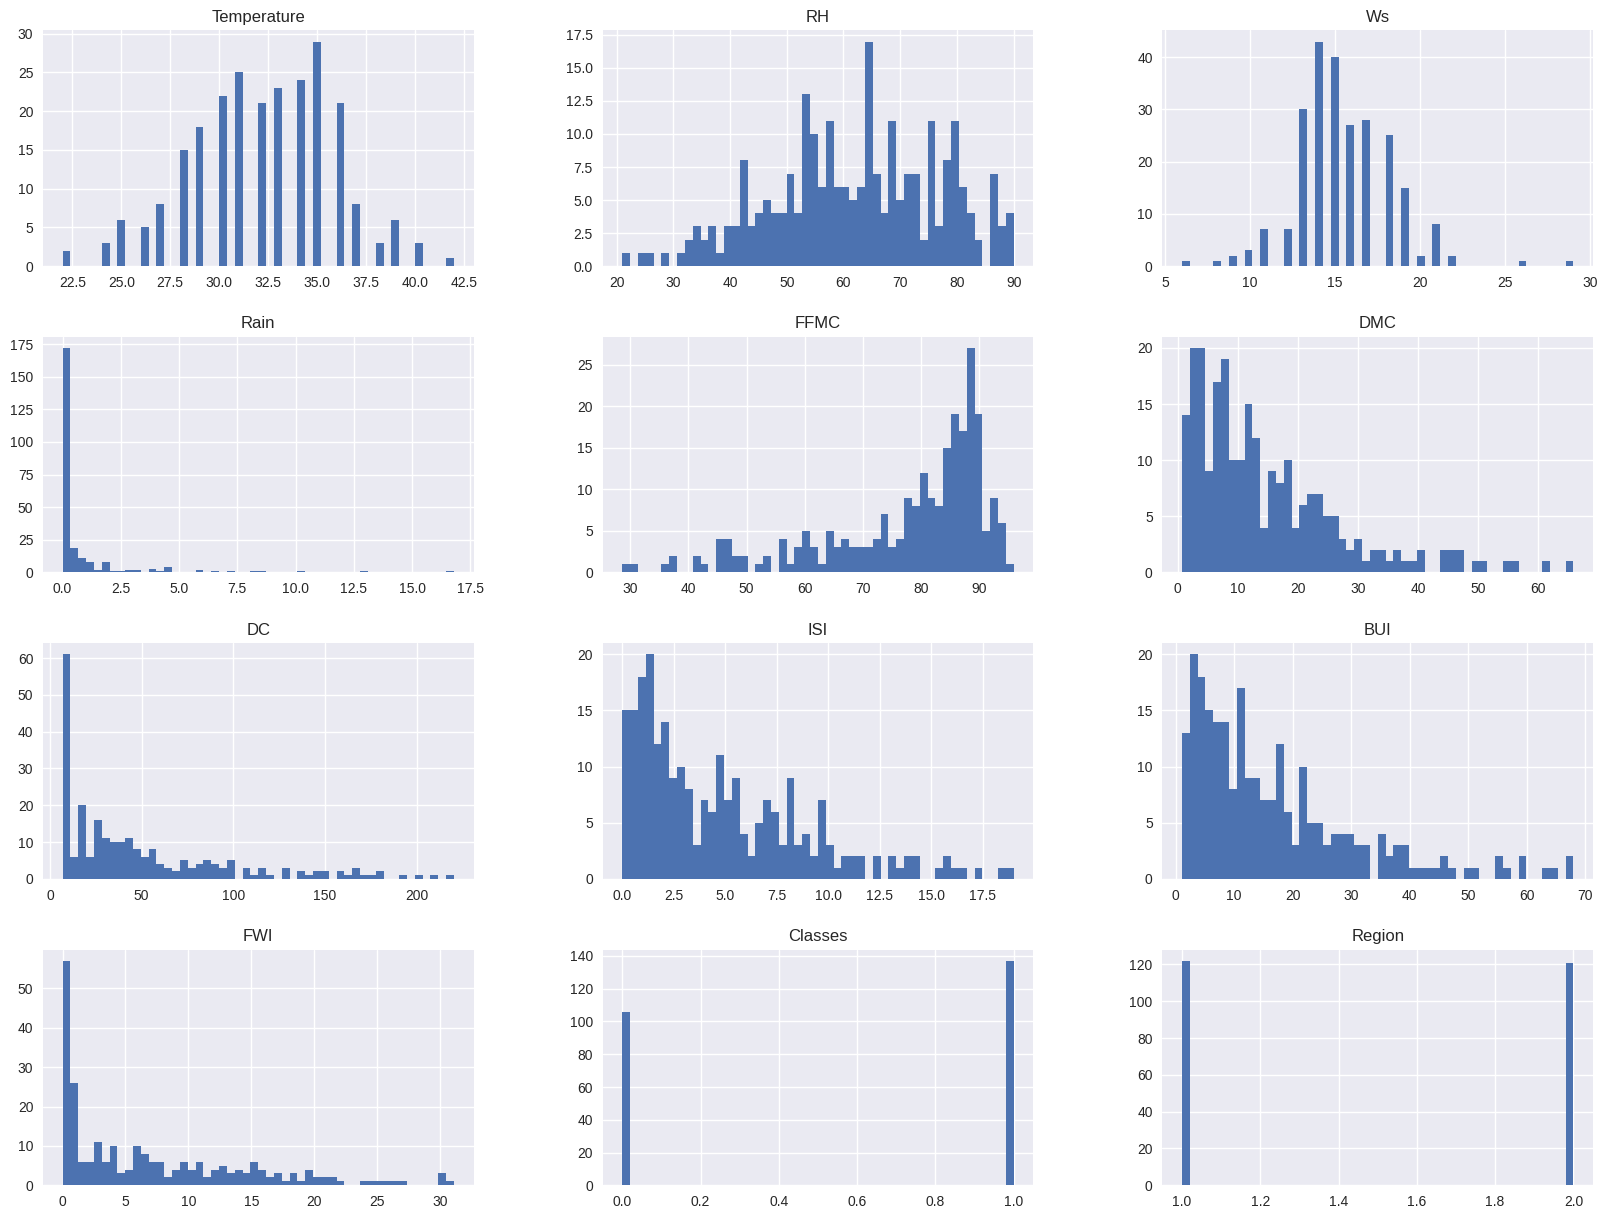

In [51]:
## ploting density graph

plt.style.use('seaborn')
df1.hist(bins=50,figsize=(20,15))
plt.show()

In [52]:
# calulation percentage for fire and not fire 
percentage = df.Classes.value_counts(normalize=True)*100

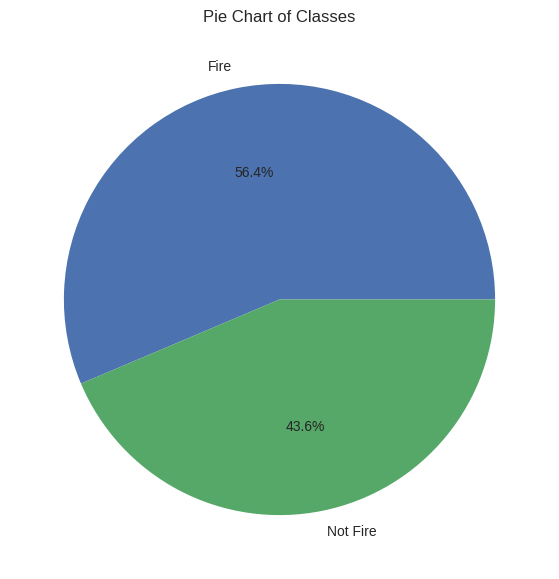

In [53]:
# ploting pie chart 

plt.figure(figsize=(8,7))
labels = ["Fire", "Not Fire"]
plt.pie(percentage, labels = labels , autopct= "%1.1f%%")
plt.title("Pie Chart of Classes")
plt.show()

In [54]:
dftemp1=df.loc[df['Region']==1]
dftemp2=df.loc[df['Region']==2]

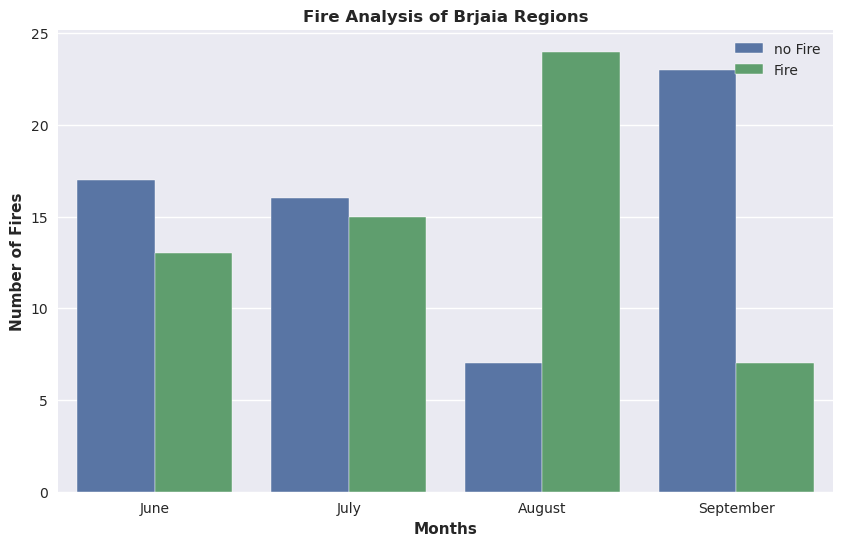

In [55]:
## Monthly Fire Analysis for region 1 (Brjaia Regions)
plt.subplots(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp1)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')
plt.legend(loc='upper right', labels=['no Fire', 'Fire'])  # Set custom legend labels)
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.show()

## Monthly Fire Analysis for region 1 (Brjaia Regions)

     1 Most of the fire happening in the month of August and July where as ,
     2 least fire catch in the months of september 

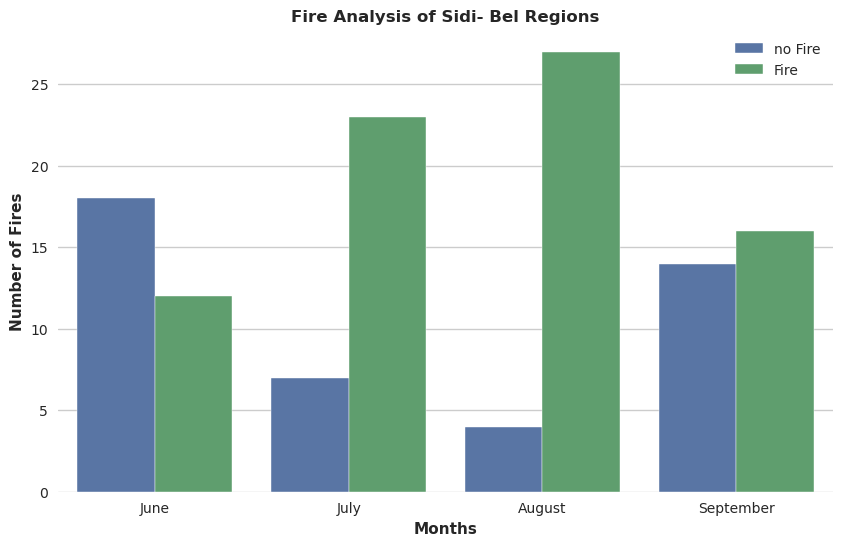

In [56]:
## Monthly Fire Analysis of region 2 (Sidi- Bel Regions)
plt.subplots(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp2)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')
plt.legend(loc='upper right', labels=['no Fire', 'Fire'])  # Set custom legend labels)
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.show()

## Monthly Fire Analysis of region 2 (Sidi- Bel Regions)

    1 Most of the fire happening in the month of August and July where as ,
    2 least fire catch in the months of June 

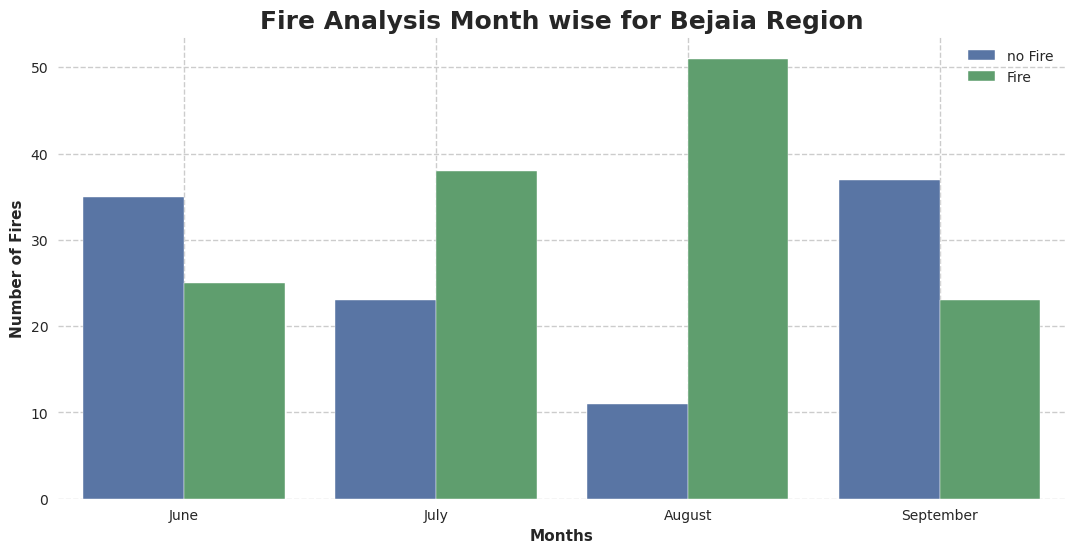

In [57]:
# Monthwise Fire Analysis for combined region

plt.figure(figsize=(13,6))
sns.countplot(x='month',hue='Classes',data = df)
plt.ylabel('Number of Fires', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.legend(loc='upper right', labels=['no Fire', 'Fire'])  # Set custom legend labels)
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(linestyle= "--")
plt.show()

## from the above plot of months, we can understand few things more 

Its observed that August and July had the most number of forest fires for both regions.

Most of the fires happened in only 3 months - June, July and August.

Lest no of Fires was on September month

In [58]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [59]:
def barchart(feature, xlabel):
    plt.figure(figsize=[14, 8])
    by_feature = df1.groupby(feature, as_index=False)['Classes'].sum()
    sns.barplot(x=feature, y="Classes", data=by_feature, estimator=sum)
    plt.xlabel(xlabel)
    plt.ylabel('Fire Count')
    plt.show()

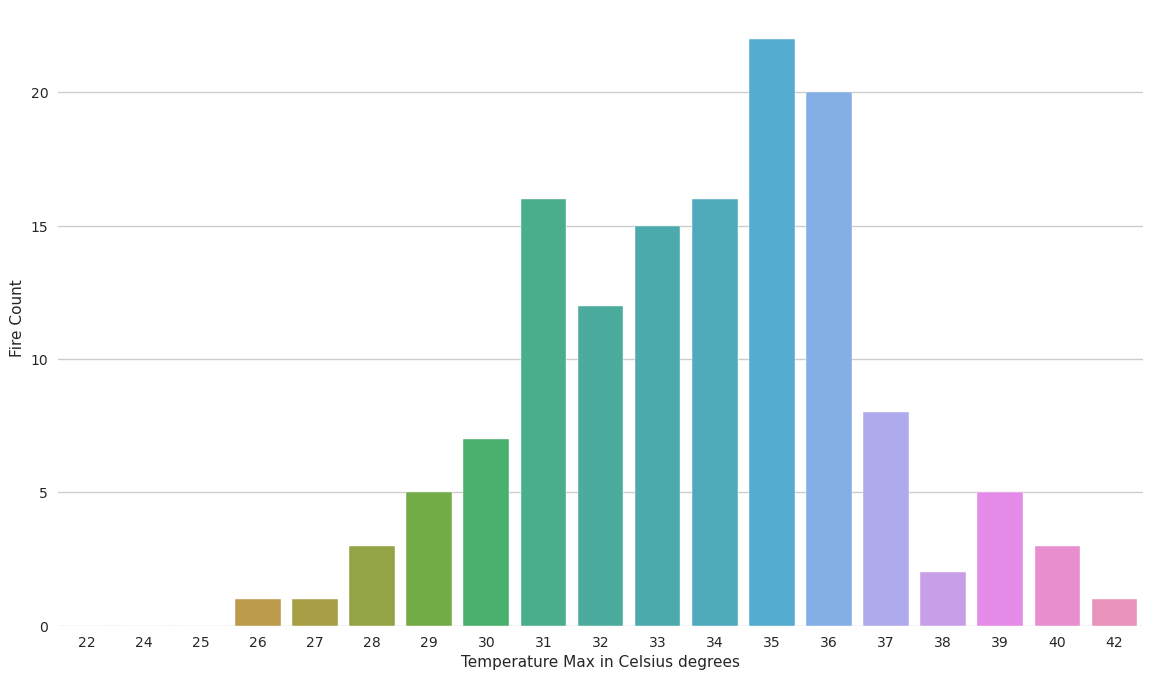

In [60]:
barchart('Temperature','Temperature Max in Celsius degrees')

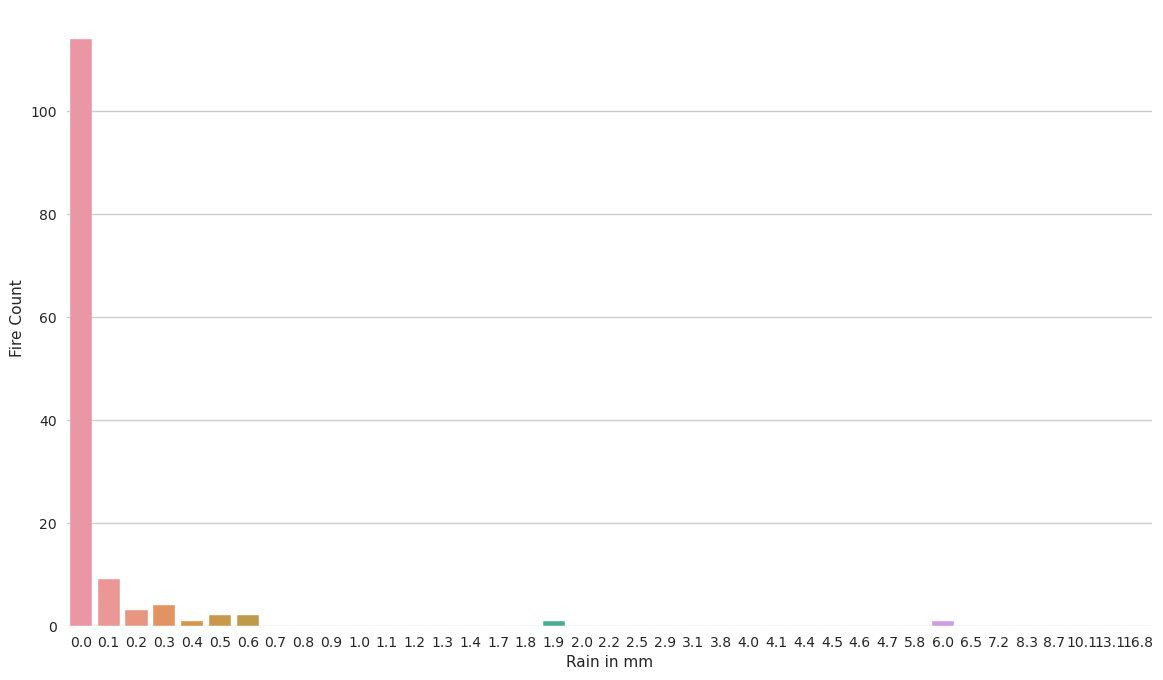

In [61]:
barchart('Rain', 'Rain in mm')

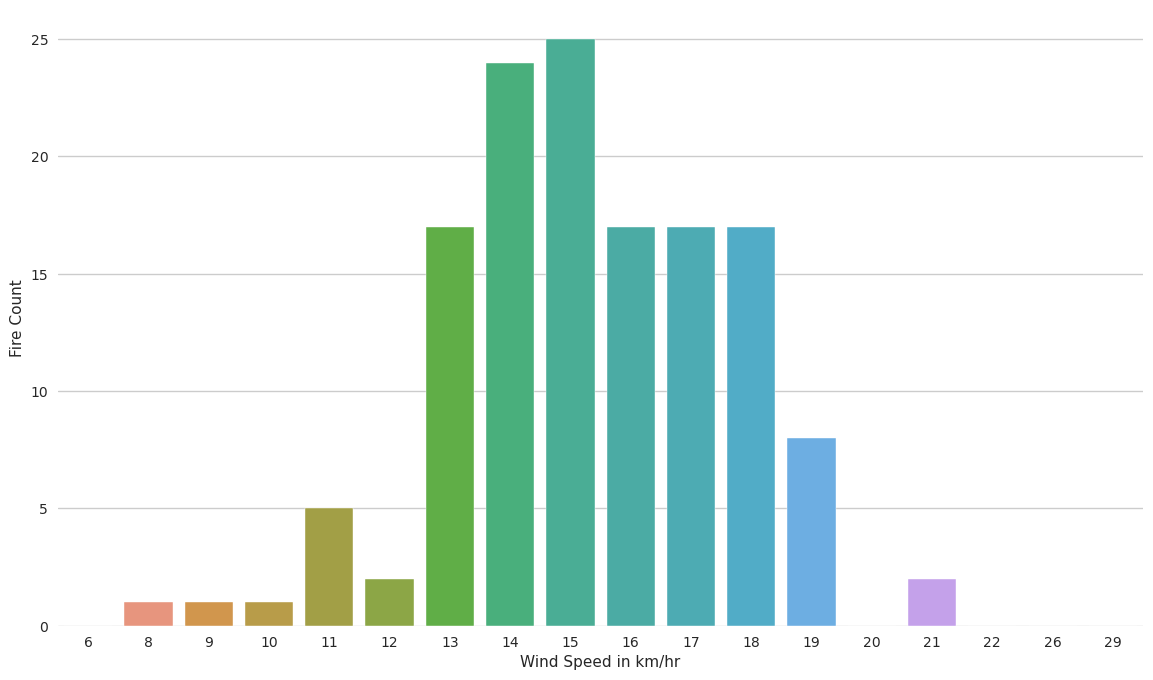

In [62]:
barchart('Ws', 'Wind Speed in km/hr')

In [63]:
barplots('RH','Relative Humidity in %')

NameError: name 'barplots' is not defined

## Weather System Report

    Temperature Highest Fire counts happened between 30-37 degree Celsius
    
    Rain Highest Fire counts happened when there was no rain to very less rain ie. 0.0 to 0.3.
    
    Wind Speed highest Fire count happened when the wind speed were between 13 to 19 Km/hr.
    
    Relative Humidity highest fire count happened when the RH is between 50 to 80%.